<a href="https://colab.research.google.com/github/SamikshaBhavsar/The_sparks_Foundation/blob/master/Task4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Name : SAMIKSHA BHAVSAR**

##**Task 4 - To Explore Decision Tree Algorithm**

**In this task we need to create a Decision Tree classifier visualize it graphically from the given ‘Iris’ dataset. The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.**


**Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets as datasets
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Importing Dataset**

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/SamikshaBhavsar/The_sparks_Foundation/master/Iris.csv")
print("Data imported successfully")


Data imported successfully



**Exploratory Data Analysis**

In [ ]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.shape

(150, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

**Visualizing the dataset**

**Lets visualize our data with Pairplot which is very useful to scatter plot all the features at once instead of plotting them individually.**

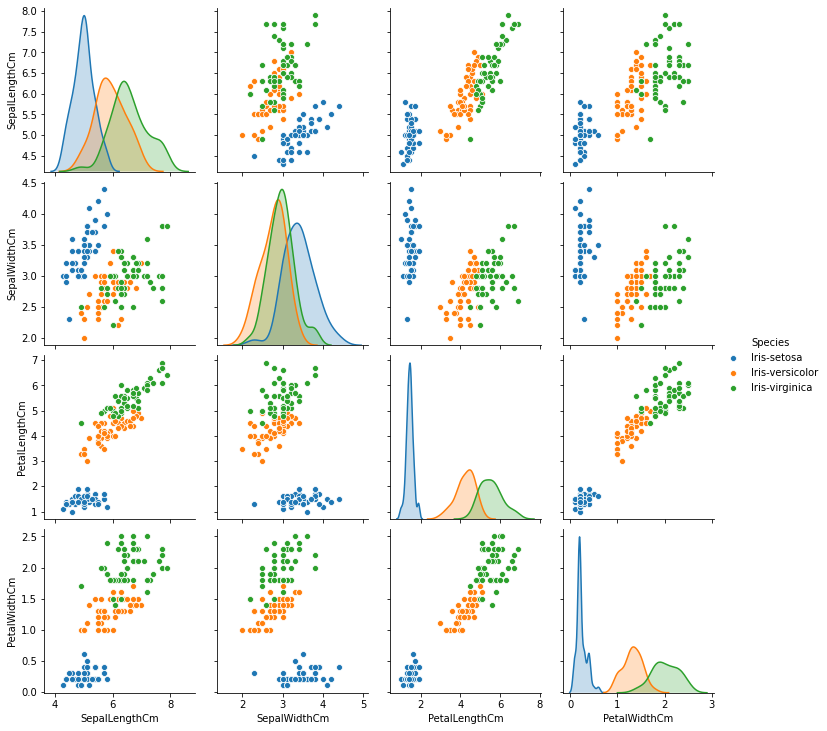

In [ ]:
sns.pairplot(df.iloc[:,1:],hue = 'Species')
plt.show()



**Now let’s visualize the data with violin plot of all the input variables against output variable which is Species. The violinplot shows density of the length and width in the species. The thinner part denotes that there is less density whereas the thicker part conveys higher density.**

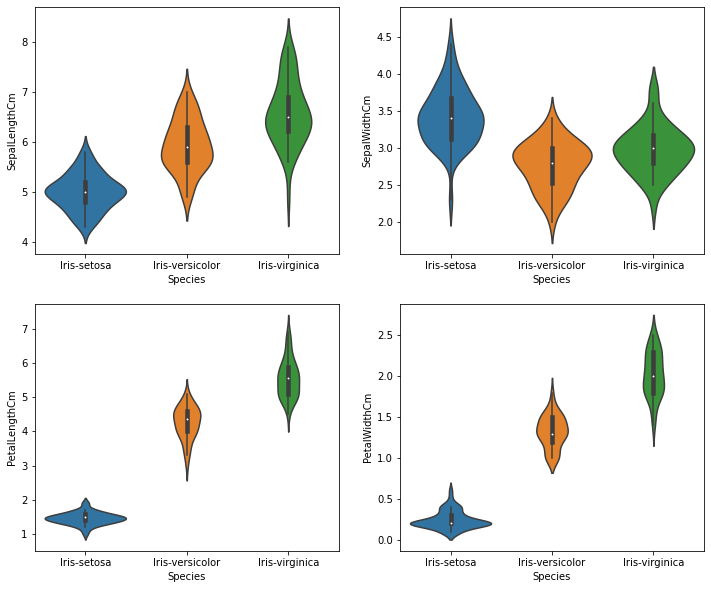

In [ ]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.violinplot(x="Species",y="SepalLengthCm",data=df)
plt.subplot(2,2,2)
sns.violinplot(x="Species",y="SepalWidthCm",data=df)
plt.subplot(2,2,3)
sns.violinplot(x="Species",y="PetalLengthCm",data=df)
plt.subplot(2,2,4)
sns.violinplot(x="Species",y="PetalWidthCm",data=df)

**And similarly use boxplot to see how the categorical feature “Species” is distributed with all other four input variables**

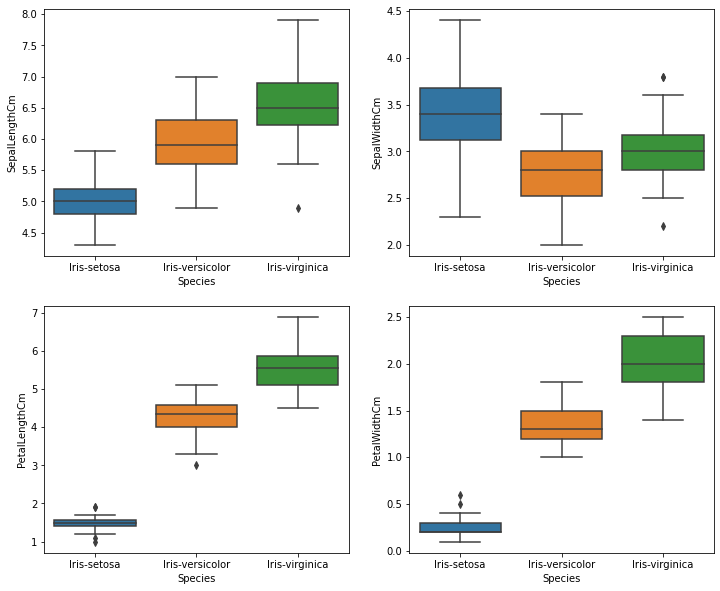

In [ ]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.boxplot(x="Species",y="SepalLengthCm",data=df)
plt.subplot(2,2,2)
sns.boxplot(x="Species",y="SepalWidthCm",data=df)
plt.subplot(2,2,3)
sns.boxplot(x="Species",y="PetalLengthCm",data=df)
plt.subplot(2,2,4)
sns.boxplot(x="Species",y="PetalWidthCm",data=df)

**Splitting the dataset into Features and Labels**

In [ ]:
X = df.iloc[:,[1,2,3,4]].values
y = df.iloc[:,-1].values

**Splitting the dataset into the Training set and Test set**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state= 0)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(112, 4)
(38, 4)
(112,)
(38,)


**Training Decision Tree Classifier on the Training set**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

**Predicting Test Results**

In [ ]:
y_pred = classifier.predict(X_test)

**Making the Confusion Matrix**

0.9736842105263158

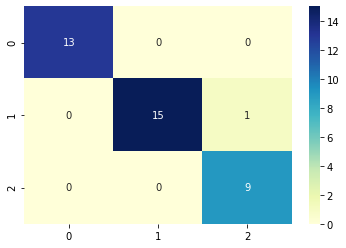

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,cmap='YlGnBu',annot=True)
accuracy_score(y_test, y_pred)

**Importing necessary libraries for graph viz**

In [ ]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

**Visualizing Decision Tree with graphviz**

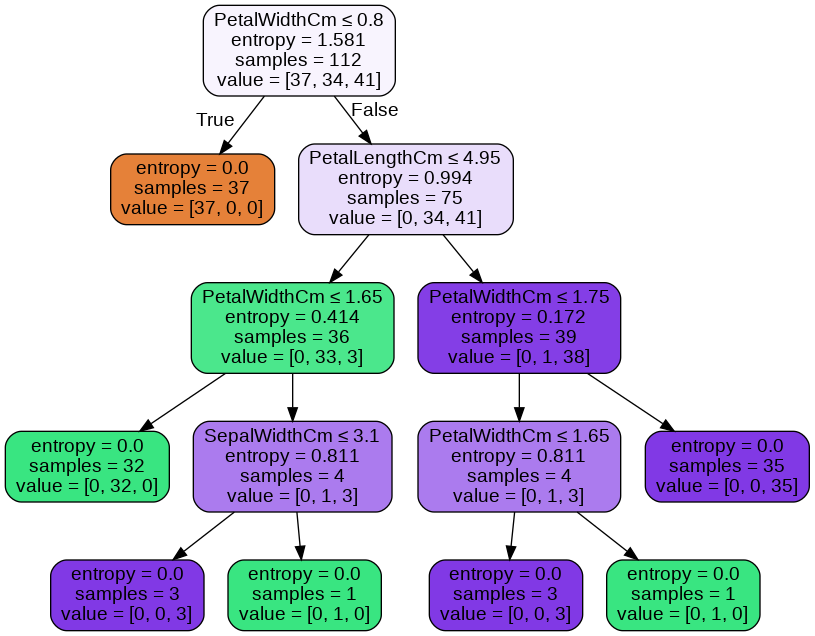

In [ ]:
dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data, feature_names=df.columns[1:-1],  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())



**We can now feed any new/test data to this classifer and it would be able to predict the right class accordingly.**